Nome:Chen Jiahao

RA:195673

Curso:Engenharia Elétrica Noturno

# Ex03 - Transformações de Intensidade (operações radiométricas)

Esta atividade tem 2 objetivos principais:
  - Entender o que são transformações radiométricas e como podem ser implementadas
  - Explorar duas aplicações para as transformações radiométricas: normalização e segmentação.

In [ ]:
# Importando as bibliotecas que serão utilizadas
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# Definindo o nome da pasta compartilhada
# IMPORTANTE: substitua "NOME_DA_PASTA_COMPARTILHADA" abaixo pelo nome correspondente
pasta_compartilhada = "P_IA905A_2024S1"

In [ ]:
# Conexão do colab com o drive
from google.colab import drive
drive.mount('/content/gdrive')
path = f"gdrive/MyDrive/{pasta_compartilhada}/Dados/Ex03/"

Mounted at /content/gdrive


## Parte 1 - Manipulando imagens

O código abaixo lê a imagem *flower.pgm* que está armazenada na pasta **Dados/Ex03** utilizando a biblioteca PIL/pillow, apresenta a imagem na tela e a transforma num array numpy.

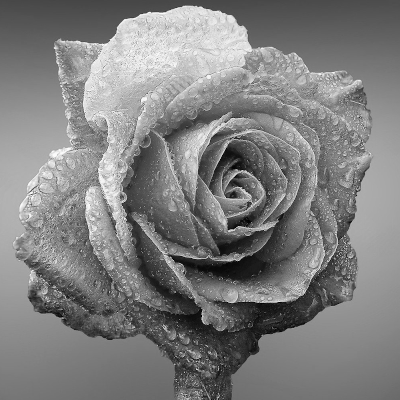

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


In [ ]:
img_file = f"{path}flower.pgm"
img = Image.open(img_file)
display(img)

# Convertendo para um array do numpy
f=np.asarray(img)
print(f)

É bastante útil poder transformar Images em PIL em arrays numpy, e vice-versa. Isso permitirá que realizemos operações matriciais nas imagens e posteriormente possamos visualizar (e salvar em arquivos) as imagens processadas.

### Exercício 1.1

**a)** Classifique a imagem como monocromática (binária, grayscale) ou multibanda (tentando identificar o padrão multibanda adotado). Descubra: qual a profundidade da imagem? Qual o maior e o menor valor de intensidade de pixel da imagem?


In [ ]:
# A imagem se trata de uma imagem monocromática em grayscale devido ao shape dela e a variação da intensiade entre 0 e 255
print(f"Shape da imagem: {f.shape}")

# Utilizando as funções de dtype, min e max do numpy podemos obter a profunidade da imagem, menor e maior valor
print(f"Profundidade: {f.dtype}")
print(f"Valor mínimo de intensidade: {f.min()}")
print(f"Valor máximo de intensidade: {f.max()}")

Shape da imagem: (400, 400)
Profundidade: uint8
Valor mínimo de intensidade: 0
Valor máximo de intensidade: 253


**b)** Leia a imagem *flower.pgm*, mostre na tela e transforme em um array numpy utilizando a biblioteca matplotlib.image. Exercite também o uso da barra de cores (colorbar).

Referência: [Tutorial Image Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html)

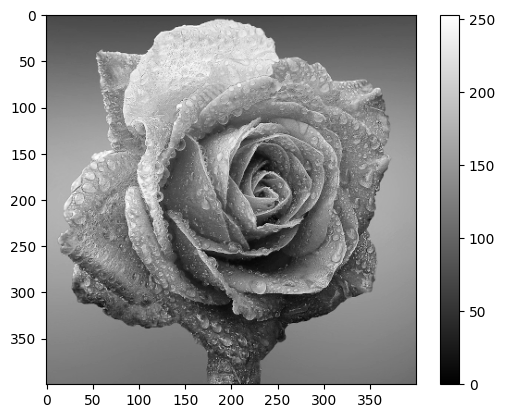

In [ ]:
img_file = f"{path}flower.pgm"
img = Image.open(img_file)

# Convertendo para um array do numpy
f=np.asarray(img)

plt.imshow(f,cmap='gray')
plt.colorbar()
plt.show()

**c)** Usando atributos do tipo [`Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes) da biblioteca `PIL`, tente responder as mesmas perguntas do item **a)**.

In [ ]:
# Seguindo a documentação do PIL, a função .mode identifica a classficação se é grayscale, RGB e etc
# o mesmo para a profundidade

print(f"Modo da imagem: {img.mode}")

# o img.mode nos retornou L, que segundo a documentação da biblioteca PIL,
# se trata de uma imagem de 8 bits em grayscale. https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes

# Para o máximo e mínimo, a função getextrema() retorna uma tuple contendo os dois valores

print(f"Mínima e máxima: {img.getextrema()}")

Modo da imagem: L
Mínima e máxima: (0, 253)


### Exercício 1.2

Imagine que a imagem está um pouco clara demais e decido escurecê-la um pouco. Minha primeira ideia seria subtrair um valor de cada pixel, uma vez que valores menores correspondem a cores mais escuras.

[[235 235 235 ... 241 240 240]
 [236 235 236 ... 241 241 241]
 [236 236 237 ... 241 241 242]
 ...
 [ 25  24  23 ...  14  14  13]
 [ 23  22  22 ...  13  13  13]
 [ 23  23  22 ...  13  13  13]]


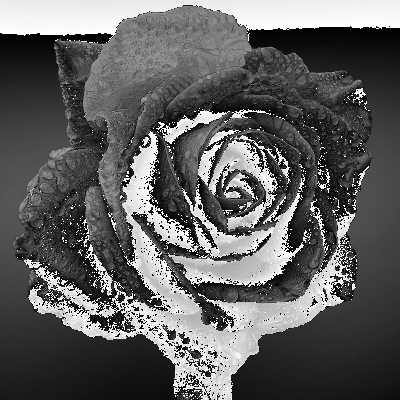

In [ ]:
# Vou escurecer a imagem, subtraindo um valor dos pixels do array f.
g=f-93
print(g)
# Agora vou transformar o array numa imagem PIL
g_img=Image.fromarray(g)
# E visualizar o resultado usando a função do PIL display
display(g_img)

**a)** Porque a imagem ficou mais clara ao invés de mais escura? Explique porque ao subtrair um determinado valor de intensidade da imagem original algumas regiões da imagem ficaram saturadas em branco.

**Comentário**

Os menores valores deram overflow e passaram a ser os valores de maior intensidade enquanto os maiores valores foram subtraídos e passaram a ser os de menor intensidade. Resultando em uma imagem mais escura e alguns locais saturado de branco

---
A principal mensagem é que podemos realizar operações quaisquer com os valores de pixel mas, no fim do dia, caso queiramos visualizar essas imagens, temos que pensar como esses valores serão mapeados para uma codificação que faça sentido no seu sistema computacional de apresentação.


**b)** Tente refazer esta mesma operação de "escurecimento" da imagem através de subtração, sem que esse efeito de saturação aconteça. Comente os métodos utilizados.

(0, 160)


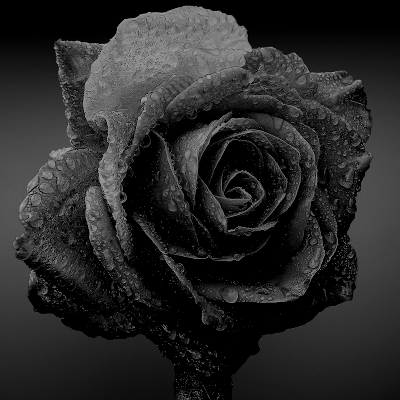

In [ ]:
def darkening_image(image, value):
  img = image.copy()
  # criando um filtro para valores menores que um threshold
  filter = (image[:,:] <= value )
  # todos os valores menors que o threshold serão 0
  img[filter] = 0

  # aplicando o filtro inverso podemos realizar a subtração do valor de threshold
  img[np.logical_not(filter)] = img[np.logical_not(filter)] - value
  return img

# escolhendo threshold = 93, obtemos o seguinte resultado com a imagem mais escura
g3 = darkening_image(f, 93)
g_img3=Image.fromarray(g3)
print(g_img3.getextrema())

display(g_img3)



## Parte 2 - Transformação de Intensidade

Tranformações de intensidade ou transformações rediométricas alteram o valor do pixel aplicando-se uma função ou tabela de mapeamento. Para entender como isso é implementado na prática, estudem atentamente o tutorial sobre ["Transformações de intensidade"](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/tutorial_ti_2.ipynb).

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


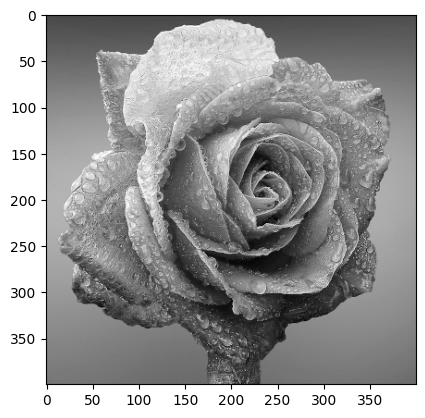

In [ ]:
print(f)
plt.imshow(f,cmap='gray')

Vamos exercitar a aplicação de um mapeamento f = T[f] a partir de uma função de transformação T. No nosso caso, a função T será o negativo da imagem.

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

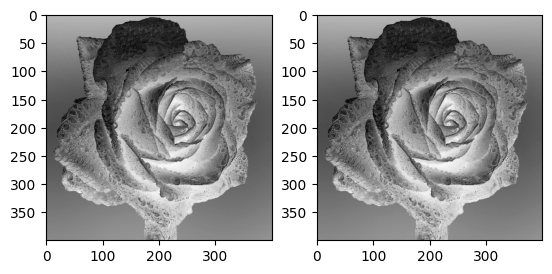

In [ ]:
T = np.arange(256).astype('uint8')        # função identidade
T1 = 255 - T                              # criando a função negação a partir da identidade
print(T1)
T2 = np.arange(255,-1,-1).astype('uint8') # criando diretamente a função negação
print(T2)

plt.subplot(1,2,1)
print(f)
f1 = T1[f]
plt.imshow(f1,cmap='gray')
plt.subplot(1,2,2)
f2 = T2[f]
plt.imshow(f2,cmap='gray')


### Exercício 2.1

Utilize transformações radiométricas para transformar a imagem e identificar o número da placa do carro apresentado na imagem abaixo. Explique seu raciocínio para chegar na solução.

float32


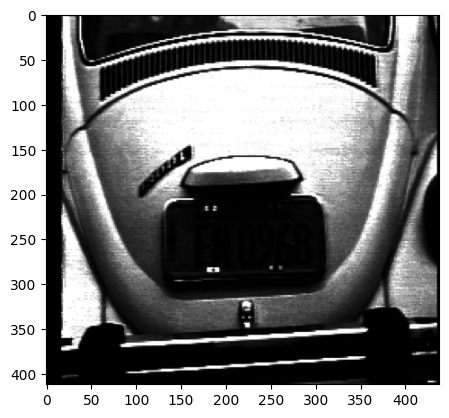

In [ ]:
f = mpimg.imread(path+'fusca.png')
plt.imshow(f,cmap='gray')
print(f.dtype)

In [ ]:
T1 = np.arange(256).astype('uint8') # função identidade
tmp = np.log(T1+1.) # logaritmica - realce partes escuras
T2 = ((tmp-tmp.min())*255/(tmp.max()-tmp.min())).astype('uint8') # normalização de 0 a 255

fusca = (255*f).astype('uint8')

Text(0.5, 1.0, 'T2[f]')

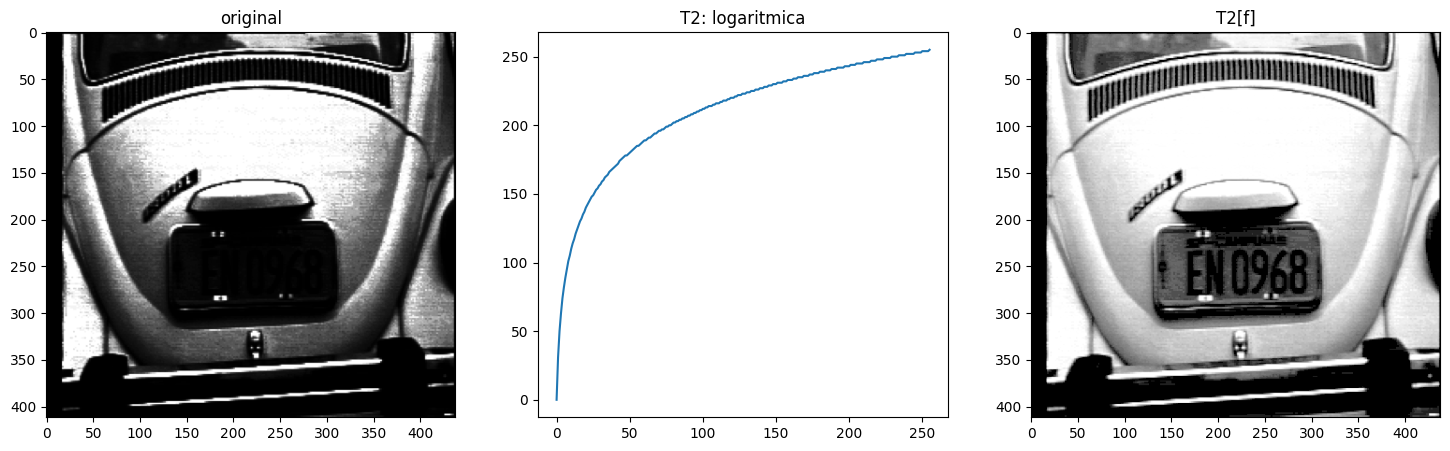

In [ ]:
# Função logarítimica
fig, axs = plt.subplots(1,3, figsize=(18, 5))

plt.subplot(131)
plt.imshow(fusca, cmap = 'gray')
plt.title('original')

plt.subplot(132)
plt.plot(T2)
plt.title('T2: logaritmica')

plt.subplot(133)
fusca2 = T2[fusca]
plt.imshow(fusca2, cmap = 'gray')
plt.title('T2[fusca]')

**Comentário**

Testando as diferentes transformações de intensidade demonstradas em ["Transformações de intensidade"](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/tutorial_ti_2.ipynb). Chega-se a conclusão que a transformaçao logarítica é a melhor para realçar as diferenças de cores escuras pois aumenta o constraste em níveis baixos de intensidade e diminui o contraste de cores claras.

No gráfico T2: logaritmica, pode ser observado que a saída é realçada na faixa 0-100 pois há um rápido crescimento na curva de transformação e a partir de 100 a curva é mais suave, compactando os valores mais claros.

### Exercício 2.2

Uma das possíveis aplicações das transformações radiométricas é a segmentação de imagens, onde destacamos um objeto de interesse dos demais objetos (ou do fundo).

**a)** A imagem abaixo mostra duas bolachas. Escolha um valor de limiar (threshold) para separar a bolacha do fundo da imagem. Crie uma função de transformação T e aplique esta transformação para obter os objetos de interesse (bolachas) pintados de branco e o fundo em preto. Comente os métodos utilizados.

dtype('uint8')

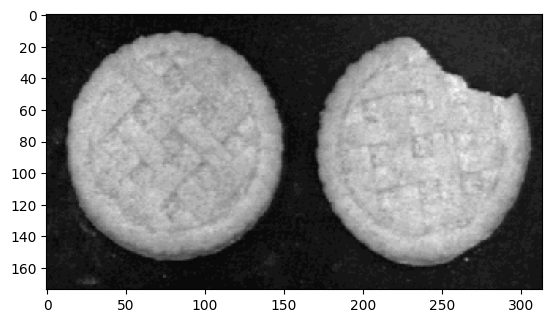

In [ ]:
plt.subplot(111)
f = mpimg.imread(path+"cookies.pgm")
plt.imshow(f,cmap='gray')
f.dtype

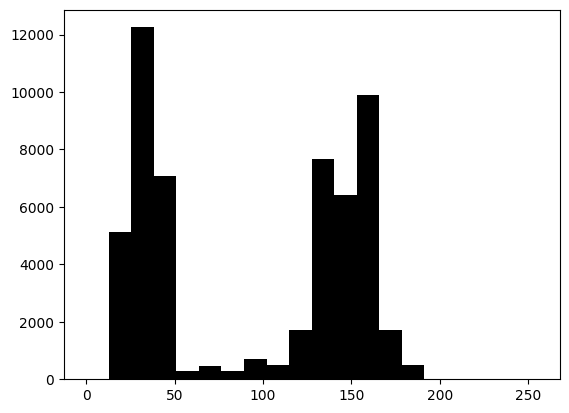

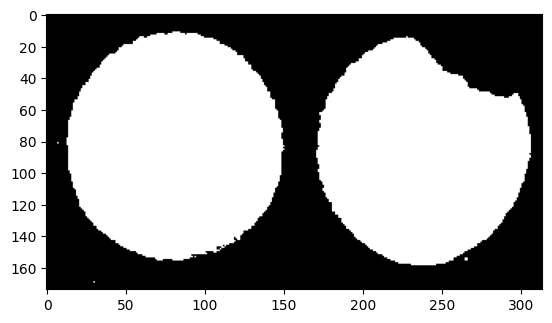

In [ ]:
# Plot do histograma para identificar o threshold a ser utilizado
def plota_hist(h,cor,nbins,bin_edges):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w, color=cor)

h, bin_edges = np.histogram(f, 20,(0,255))
plota_hist(h,'k', 20, bin_edges)
plt.show()

# Podemos identificar no plot que há um vale entre duas colunas de cores
# Portanto um range de valores possíveis são 50-100
# Foi escolhido 65

threshold = 65
g = f > threshold
plt.imshow(g, cmap = 'gray')
plt.show()


### Exercício 2.3

Leia e apresente a imagem `orquideafeec-calua.jpeg`. Execute processamentos de intensidade nas diferentes bandas da imagem (R, G, B). Comente os métodos utilizados e resultados obtidos. É possível segmentar a flor da orquídea usando uma única banda de cor?

Dica: exemplos disponíveis em [Applying point transforms e Processing individual bands](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-enhancement).

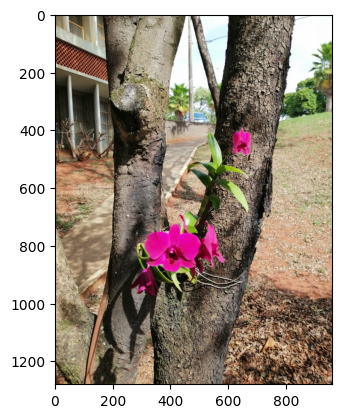

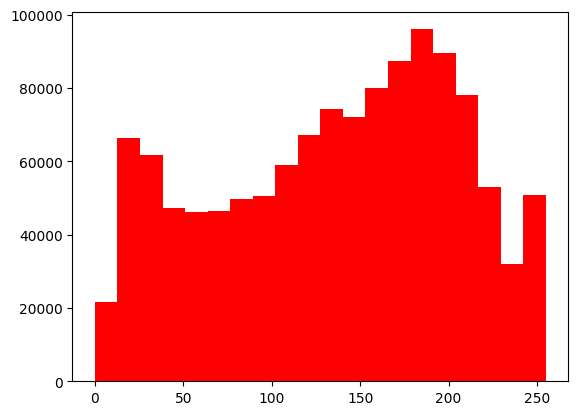

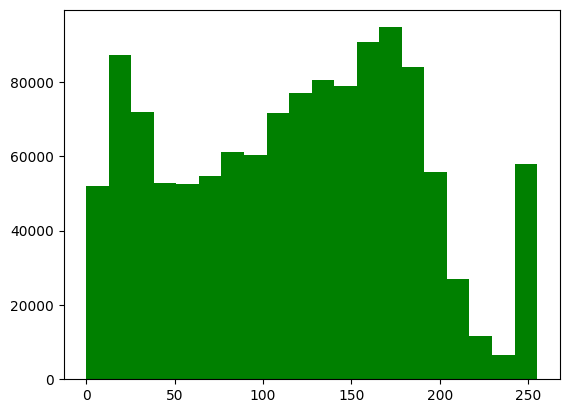

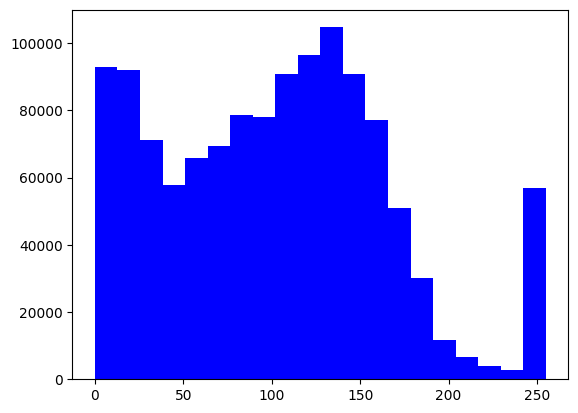

In [ ]:
im = Image.open(f"{path}orquideafeec-calua.jpeg")
plt.imshow(im)
plt.show()


R, G, B = 0, 1, 2

# Divide a imagem em bandas RGB
source = im.split()


# Plot do histograma
h, bin_edges = np.histogram(source[R], 20,(0,255))
plota_hist(h,'r', 20, bin_edges)
plt.show()
h, bin_edges = np.histogram(source[G], 20,(0,255))
plota_hist(h,'g', 20, bin_edges)
plt.show()
h, bin_edges = np.histogram(source[B], 20,(0,255))
plota_hist(h,'b', 20, bin_edges)
plt.show()


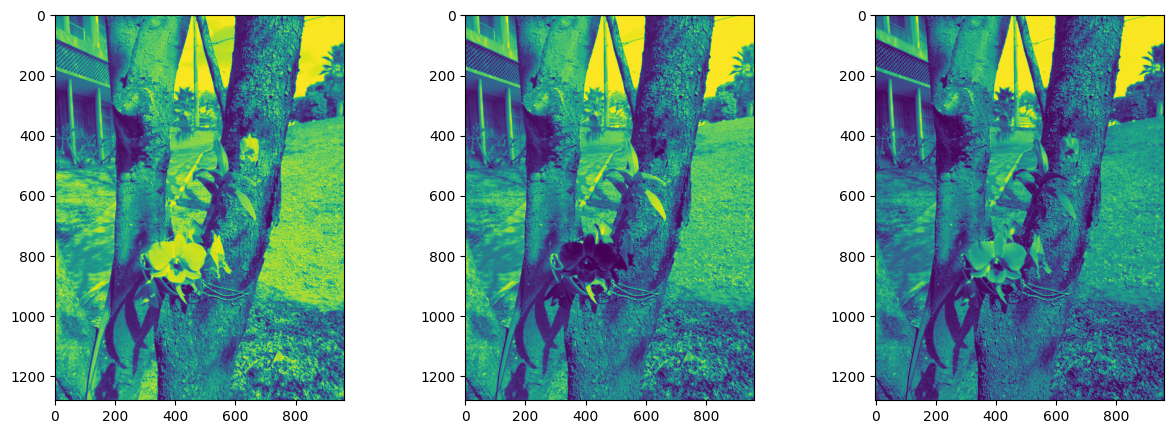

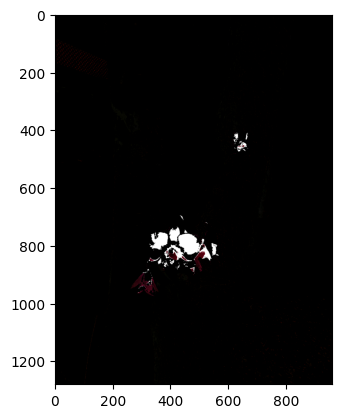

In [ ]:
from PIL import ImageFilter

out = im.filter(ImageFilter.DETAIL)


R, G, B = 0, 1, 2

source = im.split()

fig, axs = plt.subplots(1,3,figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(source[R])
plt.subplot(1,3,2)
plt.imshow(source[G])
plt.subplot(1,3,3)
plt.imshow(source[B])
plt.show()

# Podemos ver no histograma que a flor está bem escura no canal verde
# o canal azul realça bastante o céu portanto pode servir como máscara para remover o céu
# uma vez que no canal vermelho a flor e o céu compartilham dos valores mais altos

# Seleciona região escura do canal G, região da flor
mask_g = source[G].point(lambda i: i > 10 and 255)

# Seleciona região clara do canal R, intensidades próximas da flor
mask_r = source[R].point(lambda i: i > 100 and 255)

# Seleciona região clara do canal B, região do céu
mask_b = source[B].point(lambda i: i > 200 and 255)


for i in range(3):
  # Queremos remover o céu da imagem
  source[i].paste(0, None, mask_b)
  # Realçar o vermelho da flor
  source[i].paste(255, None, mask_r)
  # Máscara do canal verde para restar somente a flor na imagem
  source[i].paste(0, None, mask_g)


# construindo a imagem resultante
f  = Image.merge(im.mode, source)

plt.imshow(f)
plt.show()

O resultado acima foi obtido somente utilizando as 3 bandas da imagem. Foi utilizando um filtro do canal B para remover o céu, um do canal G para criar uma máscara para a flor e  o canal R para realçar a cor da flor.

## Parte 3 - Contando moedas em uma imagem (opicional para EA979)

Observe atentamente e tente entender os códigos abaixo, que aplicam diversas funções e conceitos para obter o valor total de um conjunto de moedas (de 5, 10 ou 25 centavos) presentes em uma imagem. De maneira geral, foram utilizadas funções de limiarização, obtenção de componentes conexos e morfologia matemática.

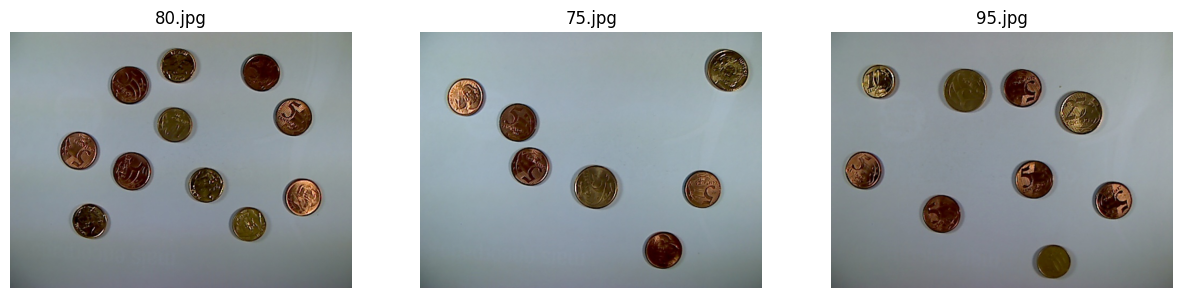

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15, 6))

path_moedas = path+'Moedas/'

list_files = os.listdir(path_moedas)
for i, file in enumerate(list_files):
  plt.subplot(1,3,1+i)
  plt.axis('off')
  plt.title(file)
  img = mpimg.imread(path_moedas+file)
  plt.imshow(img)

In [ ]:
import cv2

def seg_and_postprocessing(img, k_cl, k_op):
    binr = cv2.threshold(255 - img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    kernel_cl = np.ones((k_cl, k_cl), np.uint8)
    kernel_op = np.ones((k_op, k_op), np.uint8)

    close = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel_cl, iterations=1)
    open = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel_op, iterations=1)

    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.imshow(binr, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(close, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(open, cmap='gray')
    plt.axis('off')
    plt.show()

    return open

In [ ]:
def calc_npixels_label(img, n_labels):
    list_npixels = []
    for v in range(n_labels-1):
        npixels = (img[img == v+1]//(v+1)).sum()
        list_npixels.append(npixels)
    return list_npixels

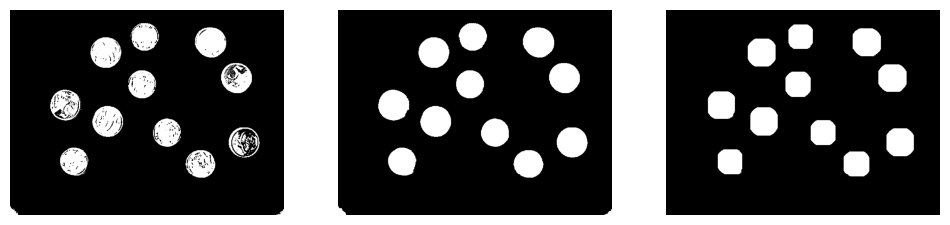

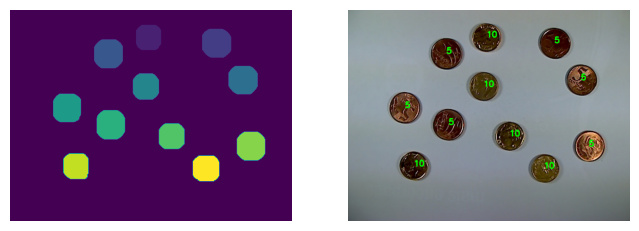

Imagem 80.jpg
Número de moedas 11
[2978, 3793, 3775, 3736, 3132, 3678, 3778, 3064, 3728, 3049, 3183]
Valor total: 80



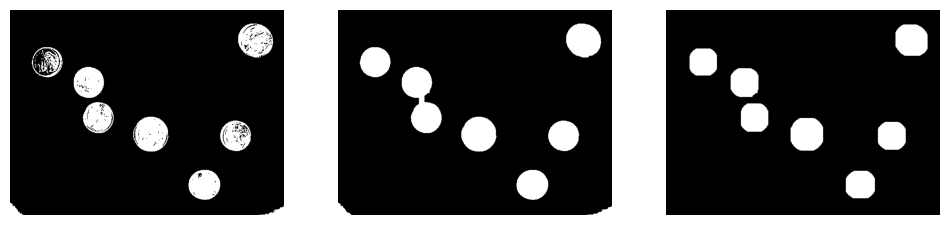

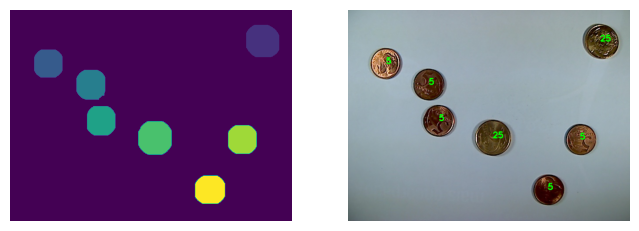

Imagem 75.jpg
Número de moedas 7
[4805, 3638, 3867, 3786, 5016, 3767, 3861]
Valor total: 75



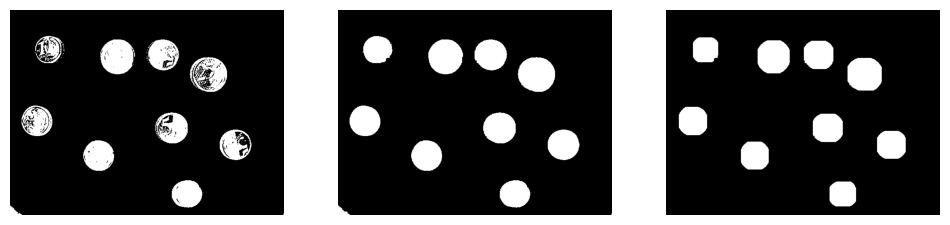

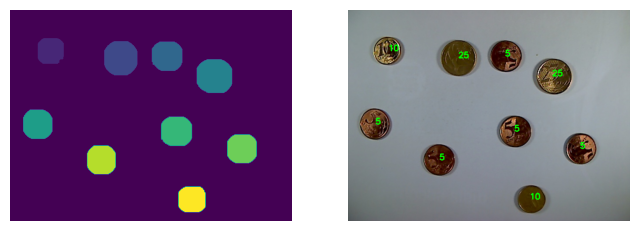

Imagem 95.jpg
Número de moedas 9
[3114, 4997, 4017, 5335, 3845, 4113, 3897, 3766, 3285]
Valor total: 95



In [ ]:
for i, file in enumerate(list_files):
  img = mpimg.imread(path_moedas+file).astype('uint8')
  img_gray = np.uint8(0.3*img[:,:,0]+0.59*img[:,:,1]+0.11*img[:,:,2])

  seg_img = seg_and_postprocessing(img_gray, 15, 31)
  output = cv2.connectedComponentsWithStats(seg_img, 4)

  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(output[1])
  plt.axis('off')

  list_npixels = calc_npixels_label(output[1], output[0])

  soma = 0
  for n, p in enumerate(list_npixels):
    x = int(output[3][n+1][0])
    y = int(output[3][n+1][1])

    if p < 3500:
      soma += 10
      cv2.putText(img, '10', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    elif p > 4600:
      soma += 25
      cv2.putText(img, '25', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    else:
      soma += 5
      cv2.putText(img, '5', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print('Imagem', file)
  print('Número de moedas', len(list_npixels))
  print(list_npixels)
  print('Valor total:', soma)
  print()

### Exercício 3.1

Utilizando como base os códigos apresentados anteriormente, crie um novo Notebook que seja uma demonstração (demo) de como obter o valor total de um conjunto de moedas em uma imagem. O Notebook deve conter uma breve descrição do problema e deve explicar passo a passo as etapas e códigos utilizados para chegar ao resultado final. Tente descrever e exemplificar cada etapa, indicando qual o seu objetivo, explicando os processamentos aplicados, as funções utilizadas e os parâmetros escolhidos. Ao final do Notebook, apresente links para referências úteis no aprofundamento dos tópicos abordados. Você também pode linkar referências interessantes ao longo do Notebook, à medida que apresenta as etapas e os conceitos relacionados.

Não se esqueça de enviar o Notebook da demo juntamente com a entrega deste Notebook!